## Laboratorium 1

Potrzebne importy bibliotek używanych przy implementacji algorytmów

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Zadanie 1 - sumowanie liczb pojedynczej precyzji

Funkcja do sumowania takich samych elementów o pojedyńczej precyzji z tablicy $N = 10^7$ przy użyciu biblioteki ```numpy```.

In [2]:
def npSum(x, n = 10**7):
    a = np.full(n, x, dtype=np.float32)
    return a.sum()

In [3]:
# x = 0.22664672136306763
x = np.float32(0.53125)
x1 = npSum(x)
print(x1)

5312500.0


Funkcja ```absoluteError``` do obliczania błędu bezwzględnego dwóch liczb. 

In [4]:
def absoluteError(x1, x2):
    return np.absolute(x1 - x2)


Funkcja ```forSum``` do sumowania takich samych elementów o pojedyńczej precyzji z tablicy $N = 10^7$ przy użyciu pętli for razem z zapisywaniem <br>
wyników co 25000 dla pokazania ich na wykresie.

In [5]:
def forSum(x, n = 10**7):
    axis_x = []
    axis_y = []
    # a = np.full(n, x, dtype = np.float32)
    acc = np.float32(x) # akumlator dla sumy liczb
    for i in range(1, n):
        acc_back = acc
        acc += x
        if i % 25000 == 0: 
            # axis_y.append(1 - (acc-acc_back)/x)
            # axis_x.append(i)
            tmp_sum = np.full(i, x, dtype=np.float32).sum()
            axis_x.append(i)
            axis_y.append(absoluteError(acc, tmp_sum) / tmp_sum)
        
    
    return acc, axis_x, axis_y

Wykres przedstawiający wartość błędu względnego dla kolejnych iteracji 

5030840.5


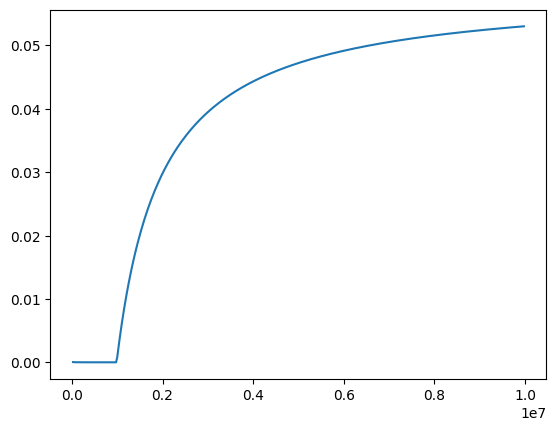

In [163]:
# tab = &emsp;
x2, axis_x, axis_y = forSum(x)
print(x2)
plt.plot(axis_x, axis_y)
plt.show()

Z wykresu można wywnioskować kilka ciekawych rzeczy:
- dla małych iteracji, suma liczb dla pojedyńczej precyzji jest porównywalna do precyzyjnego zliczania
- gdy ilość interacji zaczyna przekraczać milion, błąd względny robi silny przeskok z wartości bliskich zeru, do wartości bliskiej 0.06 (6 % zadanej wartości) <br>
    jest to spowodowane tym, że liczba zmiennoprzecinkowa o $32$ bitach przestaje rozróżniać końcowe cyfry części ułamkowej i powstaje niepoewność w wynikach.



#### Błąd bezwzględny obliczeń 

In [150]:
bb1 = absoluteError(x1, x2) ## bład bezwzględny
print(bb1)

281659.5


#### Błąd względny obliczeń

In [151]:
bw1 = bb1 / x1
print(bw1)

0.053018257


Bład względny jest taki duży - ponad 5% - ponieważ przy dodawaniu małej liczby do dużej następuje "zniknięcie" tej mniejszej, tz. następuje zrównanie wykładników
poprzez odpowiednie przesunięcie matysy. Problem pojawia się przy dodawaniu małej liczby zmiennoprzecinkowej, która musi zrównać wykładnik do tej dużej, tracąc na precyzji obliczeń.

#### Rekurencyjny algorytm sumowania

In [6]:
def recSum(tab, p, q):
    if p > q:
        return
    if p == q:
        return tab[p]
    r = (p + q)//2
    x1 = recSum(tab, p, r)
    x2 = recSum(tab, r+1, q)
    return x1 + x2
    

Wynik algorytmu rekursywnego dla tablicy takich samych liczb zmiennoprzecinkowych

In [159]:
a = np.full(10**7, x, dtype=np.float32)
x3 = recSum(a, 0, len(a) - 1)
print(x3)

5312500.0


Błąd bezwzględny dla algorytmu rekursywnego

In [160]:
print(absoluteError(x3, x1))

0.0


Bład względny dla algorytmu rekursywnego

In [161]:
print(absoluteError(x3, x1)/x1)

0.0


Ciekawym jest, że błąd względny znacznie zmalał, ponieważ w algorytmie rekursywnym dodawane do siebie liczby zmiennoprzecinkowe miały taki sam wykładnik, tz. przy dodawaniu części ułamkowej cyfr nie następowało "gubienie" precyzji jaką może nam zaoferować 32 bajty

### Porównywanie czasu działania algorytmu rekurencyjnego oraz iteracyjnego

Algorytm interacyjny (bez zapisywania danych na wykres)

In [7]:
def forSumForTime(x, n = 10**7):
    acc = np.float32(x) # akumlator dla sumy liczb
    for i in range(1, n):
        acc += x

Algorytm rekurencyjny został zaimplementowany wyżej w komórkach.

#### Wyniki porównania czasów wykonania

In [110]:
rng = np.random.default_rng()
tab = [(0.9 - 0.1) * rng.random(size=1, dtype=np.float32)  + 0.1 for _ in range(10)]
n = 10 ** 7

def compare_time(func1, func2, table, flag = True):
    for_times = []
    rec_times = []

    for i in range(10):
        y = table[i]
        a = np.full(n, y, dtype=np.float32)

        if flag:
            for_time_s = time.process_time()
            func1(table[i])
            for_time_f = time.process_time()
        else:
            for_time_s = time.process_time()
            func1(a)
            for_time_f = time.process_time()

        for_times.append(for_time_f - for_time_s)

    
    for i in range(10):
        y = table[i]
        a = np.full(n, y, dtype=np.float32)

        rec_time_s = time.process_time()
        tab_y = func2(a, 0, n - 1)
        rec_time_f = time.process_time()

        rec_times.append(rec_time_f - rec_time_s)
    
    return for_times, rec_times

In [11]:
for_times, rec_times = compare_time(forSumForTime, recSum, tab)

sample1 = np.array(for_times)
sample2 = np.array(rec_times)
# print(sample1)
# print(sample2)

print(f'Mean value of iteration algorithm: {sample1.mean()}' )
print(f'Mean value of recursion algorithm: {sample2.mean()}' )


/tmp/ipykernel_5153/3313313905.py:4: RuntimeWarning: overflow encountered in add
  acc += x


Mean value of iteration algorithm: 9.545119062400001
Mean value of recursion algorithm: 3.4729497408000056


Powyższe wyniki są wartościami średnimi z 10 wywołań każdego z algorytmów dla losowej liczby z przedziału $[0.1, 0.9]$ i $10^7$ elememtów każdej liczby.<br>
Można zauważyć, że czasy wykonania różnią się prawie o 2,73 razy dla algorytmu rekurencyjnego, który okazał się szybszy w porównaniu z iteracyjnym. Warto dodać, że algorytm rekurencyjny miał znaczny mniejszy błąd względny niż iteracyjny.

#### Przykładowe dane dla których błąd względny algorytmu rekurencyjnego nie jest równy 0.0.

In [76]:
def nonZeroErrorNum(z): # bład względny dla
    a = np.full(n, z)
    ans = recSum(a, 0, n-1)
    sum_np = npSum(z)
    print(ans)
    print(absoluteError(ans, sum_np))
    print(absoluteError(ans, sum_np) / sum_np)

In [98]:
def nonZeroErrorTab(tab): ##
    lol = np.array(tab, dtype=np.float32)
    ans = recSum(tab, 0, n-1)
    sum_np = lol.sum()
    # print(ans)
    # print(sum_np)
    # print(absoluteError(ans, sum_np) / sum_np)
    return ans

Przykład 1

In [78]:
nonZeroErrorNum(np.float32(0.89999))

8999899.0
88.0
9.777983e-06


In [77]:
nonZeroErrorNum(np.float32(0.1))

1000000.0
10.5625
1.0562611e-05


In [50]:
nonZeroErrorNum((0.9 - 0.1) * rng.random(size=1, dtype=np.float32)  + 0.1)

1428314.2
8.25
5.7760067e-06


In [79]:
sample3 = [np.float32(1000000000.01010) if i % 2 == 0 else np.float32(0.00001) for i in range(n)]
nonZeroErrorTab(sample3)

5000000000000000.0
5000019000000000.0
3.7580821e-06


Przedstawienie błędów względnych i bezwzględnych dla 10-elementowej tablicy

In [101]:
for i in range(len(tab)):
    print(f'tab[{i}]: {tab[i]}')
    tmp = nonZeroErrorTab(np.full(n, tab[i]))
    print(f'Wartość bezwzględna: {absoluteError(tmp, npSum(tab[i]))}, wartość względna: {absoluteError(tmp, npSum(tab[i])) / npSum(tab[i])}')

tab[0]: [0.25932494]
Wartość bezwzględna: 12.75, wartość względna: 4.916587386105675e-06
tab[1]: [0.15534277]
Wartość bezwzględna: 18.875, wartość względna: 1.215040265378775e-05
tab[2]: [0.29508135]
Wartość bezwzględna: 41.75, wartość względna: 1.4148841728456318e-05
tab[3]: [0.4514644]
Wartość bezwzględna: 59.0, wartość względna: 1.3068412044958677e-05
tab[4]: [0.5965511]
Wartość bezwzględna: 52.0, wartość względna: 8.716696356714237e-06
tab[5]: [0.73770434]
Wartość bezwzględna: 104.0, wartość względna: 1.4097588973527309e-05
tab[6]: [0.33542657]
Wartość bezwzględna: 6.75, wartość względna: 2.0123670765315183e-06
tab[7]: [0.49277097]
Wartość bezwzględna: 12.5, wartość względna: 2.5366687168570934e-06
tab[8]: [0.8766235]
Wartość bezwzględna: 80.0, wartość względna: 9.125840733759105e-06
tab[9]: [0.79403514]
Wartość bezwzględna: 128.0, wartość względna: 1.6120451618917286e-05


### Zadanie 2 - algorytm Kahana

#### Algorytm Kahana

In [85]:
def kahan(tab):
    suma = np.float32(0)
    err = np.float32(0)

    for i in range(len(tab)):
        y = np.float32(tab[i]) - err 
        temp = suma + y
        err = (temp - suma) - y
        suma = temp
    return suma

#### Wartość względna i bezwzględna dla algorytmu Kahana dla danych jak w zadaniu 1  

In [86]:
tab_kahan = np.full(n, x)
kahan_res1 = kahan(tab_kahan)
print(kahan_res1)

5312500.0


In [87]:
print(absoluteError(kahan_res1, x1) / x1)

0.0


In [102]:
for i in range(len(tab)):
    print(f'tab[{i}]: {tab[i]}')
    tmp = kahan(np.full(n, tab[i]))
    print(f'Wartość bezwzględna: {absoluteError(tmp, npSum(tab[i]))}, wartość względna: {absoluteError(tmp, npSum(tab[i])) / npSum(tab[i])}')

tab[0]: [0.25932494]
Wartość bezwzględna: 12.75, wartość względna: 4.916587386105675e-06
tab[1]: [0.15534277]
Wartość bezwzględna: 18.75, wartość względna: 1.2069936019543093e-05
tab[2]: [0.29508135]
Wartość bezwzględna: 42.0, wartość względna: 1.4233565707399976e-05
tab[3]: [0.4514644]
Wartość bezwzględna: 59.0, wartość względna: 1.3068412044958677e-05
tab[4]: [0.5965511]
Wartość bezwzględna: 52.0, wartość względna: 8.716696356714237e-06
tab[5]: [0.73770434]
Wartość bezwzględna: 104.5, wartość względna: 1.4165365428198129e-05
tab[6]: [0.33542657]
Wartość bezwzględna: 7.0, wartość względna: 2.086899257847108e-06
tab[7]: [0.49277097]
Wartość bezwzględna: 13.0, wartość względna: 2.6381355837656884e-06
tab[8]: [0.8766235]
Wartość bezwzględna: 81.0, wartość względna: 9.239913197234273e-06
tab[9]: [0.79403514]
Wartość bezwzględna: 127.5, wartość względna: 1.6057481843745336e-05


In [92]:
print(kahan(np.full(n, 0.23455123, dtype=np.float32)))

2345512.2


In [113]:
print(recSum(sample3, 0, n-1))
print(kahan(sample3))
print(sum(sample3))
print(np.sum(np.array(sample3)))

5000000000000000.0
5000000000000000.0
5000000000000000.0
5000019000000000.0


#### Własnościu numeryczne algorytmu Kahana

Własnościu numeryczne algorytmu Kahana są lepsze od innych algorytmów, ponieważ utracone niższe bity przy dodawaniu małej liczby do sumy liczb wcześniejszych dodanych są dodawane w następnej iteracji do następnego elementu w tablicy, przez co udaje się zachować utraconą precyzję. Zmienna err jest potrzebna by zapisywać utracone bity w kolejnych iteracjach. <br> $err = (temp - suma) - y$ odzyskuje -(niższe bity)

#### Porwównanie czasów działania algorytmu rekurencyjnego i Kahana dla tych samych danych wejściowych

In [114]:
kahan_times, recur_times = compare_time(kahan, recSum, tab, flag=False)

sample1 = np.array(kahan_times)
sample2 = np.array(recur_times)
# print(sample1)
# print(sample2)

print(f'Mean value of kahan algorithm: {sample1.mean()}' )
print(f'Mean value of recursion algorithm: {sample2.mean()}' )

Mean value of kahan algorithm: 6.745570805899979
Mean value of recursion algorithm: 3.4633999996000058


### Zadanie 3 - sumy częściowe